# Análisis de Lanzamiento del Pitcher: Clayton Kershaw

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
def serieFill(SerieIN,SerieRef):
    
    SerieOUT = pd.Series(0,SerieRef)
    for index in SerieRef:
        if index in SerieIN:
            SerieOUT[index]=SerieIN[index]
    
    return SerieOUT

def countOUT(SerieIN,SerieRef):
    ss = serieFill(SerieIN,SerieRef)
    V=0
    for word in SerieRef:
        if 'out' in word:
            #print(word+ '=',ss[str(word)])
            V=V+ss[str(word)]

    return V          


In [4]:
#carga de archivo: 
dd = pd.read_csv('ClaytonKershaw2020.csv')


#ajuste a formato válido de formato de fecha
dd['game_date'] = dd['game_date'].astype('datetime64[ns]')
#dd.info()

# clean data
dd_clean=dd.drop(dd[dd['pitch_type'].isna()].index)
print('data antes del clean', dd.shape[0]) 
print('data despues del clean', dd_clean.shape[0])


data antes del clean 888
data despues del clean 888


In [5]:
#dias de los juegos
index_games= dd_clean.groupby(dd_clean['game_date']).sum().index

#definición de columnas de interés
tipos_lanzamientos = dd_clean.groupby('pitch_type')['pitch_type'].count().index
tipos_eventos = dd_clean.groupby('events')['events'].count().index
tipos_resultados = dd_clean.groupby('bb_type')['bb_type'].count().index

cols_1 = ['innings', 'lanzamientos']
cols_2 = list(tipos_lanzamientos) 
cols_3 = list(tipos_eventos)
cols_4 = list(tipos_resultados)

cols = cols_1 + cols_2 + cols_3 + cols_4
result = pd.DataFrame(columns=cols,index=index_games)


In [6]:
for index_date in index_games:
    date = index_date
    game_data=dd_clean[dd_clean['game_date']==index_date]
    
    total_innings = game_data.inning.max() #falta decimales
    total_lanzamientos = game_data.groupby('pitch_type')['pitch_type'].count()
    total_eventos  = game_data.groupby('events')['events'].count()
    total_resultados = game_data.groupby('bb_type')['bb_type'].count()    
        
    result.loc[index_date, cols_1[0]] = total_innings
    result.loc[index_date, cols_1[1]] = total_lanzamientos.sum()
    result.loc[index_date, cols_2[:]] = serieFill(total_lanzamientos,tipos_lanzamientos)
    result.loc[index_date, cols_3[:]] = serieFill(total_eventos,tipos_eventos)
    result.loc[index_date, cols_4[:]] = serieFill(total_resultados,tipos_resultados)    
    out_totales = countOUT(total_eventos, tipos_eventos)


In [8]:
#Criterios de selección de juego o juegos
#Mayor numero de lanzamientos
MNP = result.sort_values('lanzamientos').tail()
#Mayor cantidad de innings
MNI = result.sort_values('innings').tail()
#Mayor Hits recibido
MNH = result.sort_values('single').tail()


Text(0.5, 1.0, 'Distribución de Lanzamientos')

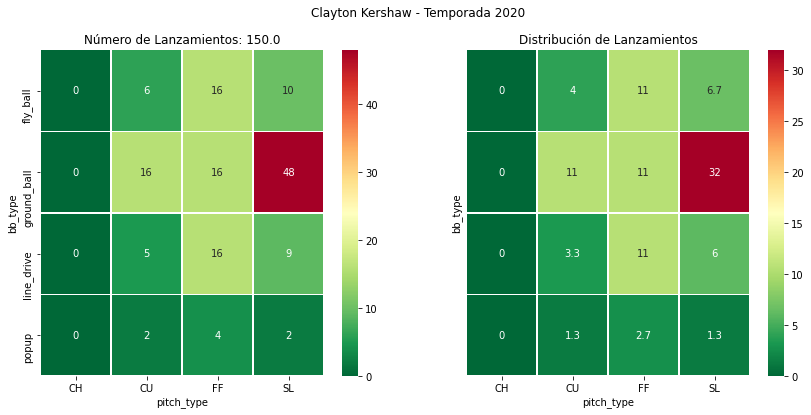

In [9]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))
fig.suptitle('Clayton Kershaw - Temporada 2020') 


# df = pd.DataFrame(index=tipos_lanzamientos,columns=tipos_eventos)
# for te in tipos_eventos:
#     d=dd_clean[dd_clean['events']==te]
#     for tl in tipos_lanzamientos:
#         df.loc[tl,te]=np.float(d[d['pitch_type']==tl].shape[0])

# 
df = pd.DataFrame(columns=tipos_lanzamientos,index=tipos_resultados)
for tl in tipos_lanzamientos:
    d=dd_clean[dd_clean['pitch_type']==tl]
    for te in tipos_resultados:
        df.loc[te,tl]=np.float(d[d['bb_type']==te].shape[0])


df = df.apply(pd.to_numeric)

sns.heatmap(df,cmap='RdYlGn_r', linewidths=0.5, annot=True,ax=axes[0])
sns.heatmap(100*df/df.sum().sum(),yticklabels=False,cmap='RdYlGn_r', linewidths=0.5, annot=True,ax=axes[1])
axes[0].set_title('Número de Lanzamientos: {}'.format(df.sum().sum()) )
axes[1].set_title('Distribución de Lanzamientos')


<AxesSubplot:ylabel='events'>

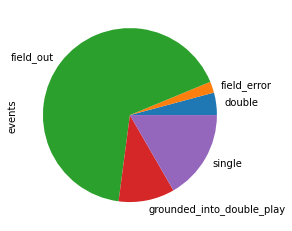

In [10]:
dm = dd_clean[(dd_clean['pitch_type']=='SL') & (dd_clean['bb_type']=='ground_ball')]
dm.groupby('events')['events'].count().plot.pie()